<a href="https://colab.research.google.com/github/multi-proj/API/blob/master/Soccer_Team/Reference/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

* 서포트 벡터 머신(support vector machine, SVM)은 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다. 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든
다.

* support vector(가장 근접한 train data)만 사용 --> 계산량 감소

https://www.slideshare.net/freepsw/svm-77055058

필요한 라이브러리를 호출하고
cancer 데이터를 호출하자

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from
cancer = datasets.load_breast_cancer()

cancer 데이터 확인

In [0]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [0]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
cancer.data.shape

(569, 30)

In [0]:
cancer.data[0:5]

In [0]:
cancer.target

In [0]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

입력 데이터 : cancer.data - 암 수치 데이터

출력 데이터 : cancer.target - 암 발병 여부

입력 데이터 와 출력데이터를 훈련셋과 테스트셋으로나누어 주자

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=0)

이번 예측 모델은 SVM을 사용 할 것이다. 라이브러리 호출해주고

선형 커널을 사용해서 모델을 생성해주자.

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

만든 clf 모델에 xtrain,ytrain 데이터를 fit해주자

In [0]:
clf.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

테스트셋을 모델에 입력해 이후 값을 예측해보자.

In [0]:
yResult = clf.predict(xtest)

accuracy(정확도)
(양성이든 음성이든 상관없이) 예측한 것들 중에서 얼마나 맞추었는가?

precision
양성으로 예측한 놈들 중에서, 실제로 양성인 놈이 얼마나 있는가?

모델의 성능을 accuracy와 precision으로 평가한다.

In [0]:
from sklearn import metrics
metrics.accuracy_score(ytest,yResult), metrics.precision_score(ytest,yResult)

(0.9590643274853801, 0.9809523809523809)

이번에는 붓꽃데이터로 예측해보자.

라이브러리를 호출해주고 붓꽃데이터를 호출한다~

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

In [0]:
iris

sepal.length, sepal.width을 이용해 결과를 예측해보자

입력 데이터 : iris.data - 붓꽃 수치 데이터(sepal.length, sepal.width)

출력 데이터 : cancer.target - 붓꽃 품종 데이터


In [0]:
x = iris.data[:,:2] 
y = iris.target

In [0]:
x.shape,y.shape

((150, 2), (150,))

plt.scatter를 이용해 어떻게 분포되어있는지 산점도로 확인한다.

<function matplotlib.pyplot.show>

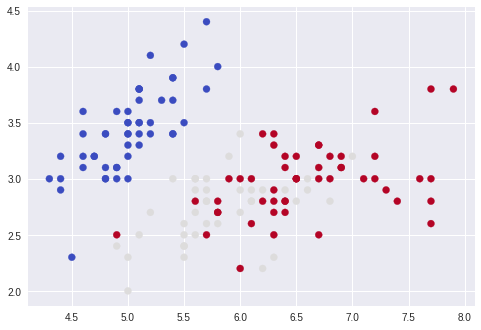

In [0]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm)
plt.show

In [0]:
from sklearn import svm, datasets

---

**감마 매개변수**

* gamma 매개변수는 앞 절의 공식에 나와 있는 γ로 가우시안 커널 폭의 역수에 해당합니다. gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정합니다. 작은 값은 넓은 영역을 의미하며 큰 값일 경우 영향이 미치는 범위가 제한적입니다. 다른 말로 하면, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커집니다.

* 작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춥니다. 반면에 큰 gamma 값은 더 복잡한 모델을 만듭니다.
 
* train data 하나가 영향을 끼치는 범위 조절

* gamma값 증가 --> 영향 범위 감소

**C 매개변수**

* cost

* C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수입니다. 이 매개변수는 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한합니다

* C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 합니다.

* cost값 증가 --> train data를 최대한 만족 --> margin 감소 --> 새로운 data 적용시, 오류 발생 가능성 증가

**Grid Search**

* cost-gamma table 형성 --> 그 중, 성능 높은것을 찾는다



![image](https://tensorflowkorea.files.wordpress.com/2017/06/2-42.png?w=625)


---

**커널함수란**

선형 분류가 불가능한 데이터에 대한 처리를 하기 위해 데이터의 차원을 증가시켜 하나의 초평면으로 분류할 수 있도록 도와주는 함수

커널을 사용하면 베이시스 함수를 하나씩 정의하는 수고를 덜 수 있을뿐더러 변환과 내적에 들어가는 계산량이 줄어든다

**커널종류**

선형 서포트 벡터 머신

다항 커널 (Polynomial Kernel)

RBF(Radial Basis Function) 또는 가우시안 커널(Gaussian Kernel)

시그모이드 커널 (Sigmoid Kernel)


svm 모델을 만들어 준다.

이때 커널은 linear와 poly를 이용해 2개 생성한다.
생성 후 x,y를 fit해준다.

In [0]:
svc = svm.SVC(kernel='linear',C=1.0)
svc.fit(x,y)
ply_svc = svm.SVC(kernel='poly',degree=3,C=1.0,gamma=0.7)
ply_svc.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

두 모델로 예측해보자

In [0]:
svc.predict([[5.2,3.5]])

array([0])

In [0]:
ply_svc.predict([[5.2,3.5]])

array([0])

모델의 정확성을 평가하면 다음과 같다.

In [0]:
from sklearn import metrics
metrics.accuracy_score(svc.predict([[5.2,3.5]]),[0])

1.0

마지막으로 digits 데이터로 SVM 모델을 만들어 예측해보자.

In [0]:
digits = datasets.load_digits()

기본 svm 모델 clf 와

감마와 C를 조정한 모델 clf2를 생성해준다.

In [0]:
clf = svm.SVC()
clf2 = svm.SVC(gamma = 0.01, C = 100)

data 데이터와 target 데이터의 형태를 확인하고

입력데이터 x와 출력데이터 y에 넣어준다.

In [0]:
#digits.data[:-10],digits.target[:-10]
x,y = digits.data[:-10],digits.target[:-10]

두 모델에 데이터를 fit~~~

In [0]:
clf.fit(x,y)
clf2.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

-5 번 데이터의 이미지를 확인해보자.

9와 같은 형태의 이미지가 출력된다.

<function matplotlib.pyplot.show>

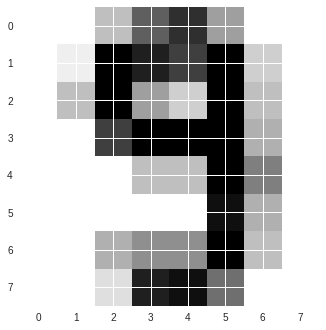

In [0]:
#digits.data[-5]
import matplotlib.pyplot as plt
plt.imshow(digits.images[-5],cmap=plt.cm.gray_r)
plt.show

-5번의 data 데이터를 모델에 입력해 결과를 예측해보자.

그냥 입력시 모델에 입력하는 데이터의 형태와 달라 오류가 난다 reshape를 해주자.

결과확인

In [0]:
rResult = clf.predict(digits.data[-5].reshape(1,-1))
rResult2 = clf2.predict(digits.data[-5].reshape(1,-1))
rResult,rResult2

(array([9]), array([9]))

모델의 정확성을 확인하자.

In [0]:
metrics.accuracy_score(rResult,digits.target[-5].reshape(1,-1))

1.0